## Universidade do Estado do Amazonas
### Disciplina: Redes Neurais Artificiais 2025/1
### Integrantes: 
> Emanuelle Marreira - 2215080035

> Afonso Garcia - 1615080003

> Italo Ferreira - 2215080012

> João Carvalho - 2215080040 

## Identificador

In [27]:
identificador = (5+3+2+0)%4
print(identificador)

2


## Bibliotecas

In [28]:
import random
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
np.set_printoptions(precision=4, suppress=True)

## Definição do Neurônio Perceptron

In [29]:
class NeuronioPerceptron:
    def __init__(self, learning_rate = 0.1, interval = (-0.5, 0.5)):
        self.learning_rate = learning_rate
        self.n_features = 2
        self.initial_weights = np.random.uniform(interval[0], interval[1], size = self.n_features + 1)
        self.weights = self.initial_weights.copy()
        self.epochs = 0
        self.total_adjusted_weights = 0
        self.bias = -1

    def activate(self, theta):
        return np.where(theta >= 0, 1, 0)

    def predict(self, X_bias):
        input = np.dot(X_bias, self.weights)
        return self.activate(input)
    
    def adjust(self, error, xi):
        self.weights = self.weights + self.learning_rate * error * xi
        self.total_adjusted_weights += 1

    def fit(self, X_train, y_train, n_epochs = 0):
        X_train_bias = np.insert(X_train, 0, self.bias, axis = 1)

        if n_epochs == 0:
            converged = False
            while not converged:
                self.epochs += 1
                error_occured = False
                for xi, yd in zip(X_train_bias, y_train):
                    y_predicted = self.predict(xi)
                    error = yd - y_predicted
                    if error != 0:
                        self.adjust(error, xi)
                        error_occured = True
                if not error_occured:
                    converged = True
            return self
        else: 
            while self.epochs <  n_epochs:
                indexes = list(range(len(X_train_bias)))
                random.shuffle(indexes)
                X_train_bias = X_train_bias[indexes]
                y_train = y_train[indexes]
                for xi, yd in zip(X_train_bias, y_train):
                    y_predicted = self.predict(xi)
                    error = yd - y_predicted
                    if error != 0:
                        self.adjust(error, xi)
                self.epochs += 1
            return self

## Parte 1 - Resolvendo um problema linearmente separável

### Definição dos dados

In [30]:
dados = np.fromfile('dataAll.txt', dtype = np.float64)
dados = dados.reshape(-1,1,3)
print(f"Dados carregados: {dados.shape}")
dados = dados.reshape(-1, 3)
print(f"Dados carregados: {dados.shape}")
X = dados[:, [0,1]]  # x1 e x2
yd = dados[:, 2]   # yd
print(f"X = {X[:5]}...")
print(f"yd = {yd[:5]}...")

Dados carregados: (1000, 1, 3)
Dados carregados: (1000, 3)
X = [[-363.7884  244.1423]
 [ 328.7572 -256.7658]
 [-164.9827  613.2164]
 [ 536.5905  764.9575]
 [ 314.2297  343.8375]]...
yd = [0. 1. 0. 0. 0.]...


### Treinamento 

In [31]:
neuronio_perceptron = NeuronioPerceptron()
neuronio_perceptron = neuronio_perceptron.fit(X, yd)

print(f"Número total de ajustes nos pesos: {neuronio_perceptron.total_adjusted_weights}")
print(f"Número de épocas até a convergência: {neuronio_perceptron.epochs}")

Número total de ajustes nos pesos: 59
Número de épocas até a convergência: 3


### Impressão dos resultados

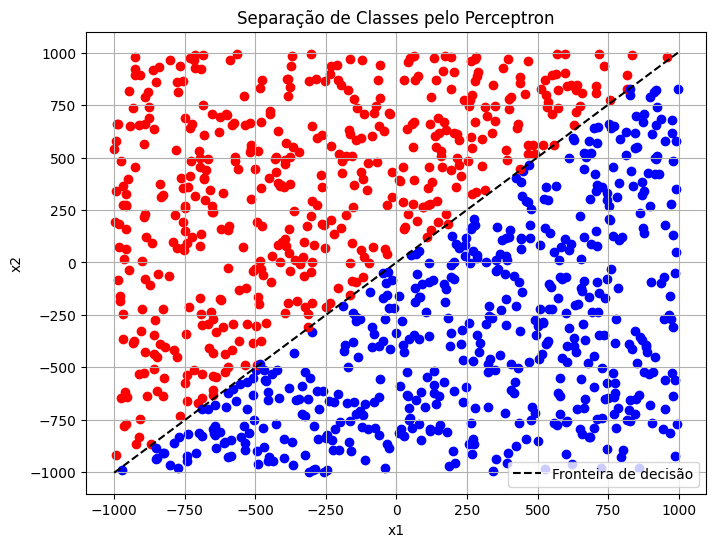

In [32]:
plt.figure(figsize=(8, 6))

for i in range(len(X)):
    cor = 'red' if yd[i] == 0 else 'blue'
    plt.scatter(X[i][0], X[i][1], c=cor)
    
w = neuronio_perceptron.weights
x_1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)

if w[2] != 0:
    x_2 = (w[0]/w[2]) - ((w[1]/w[2]) * x_1)
    plt.plot(x_1, x_2, 'k--', label='Fronteira de decisão')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Separação de Classes pelo Perceptron')
plt.grid(True)
plt.legend()
plt.show()

## Parte 2

### Definição dos dados - data2.txt

In [33]:
dados = np.fromfile('data2.txt', dtype=np.float64)

n_valores_validos = (dados.size // 3) * 3
dados = dados[:n_valores_validos] 

dados = dados.reshape(-1, 3)
X = dados[:, :2]
yd = dados[:, 2]

taxas = [0.4, 0.1, 0.01]
intervalos = [(-100, 100), (-0.5, 0.5)]

### Treinamento com a nova configuração 

In [34]:
resultados = []

> η = 0.4, I = (-100, +100)

In [35]:
ajustes = []
epocas = []
for repeticao in range(10):
    perceptron = NeuronioPerceptron(learning_rate=0.4, interval=(-100, 100))
    perceptron.fit(X, yd)
    ajustes.append(perceptron.total_adjusted_weights)
    epocas.append(perceptron.epochs)
resultados.append(("η=0.4", "(-100, 100)", f"{np.mean(ajustes):.2f} ± {np.std(ajustes):.2f}", min(epocas)))

> η = 0.4, I = (-0.5, +0.5)

In [36]:
ajustes = []
epocas = []
for repeticao in range(10):
    perceptron = NeuronioPerceptron(learning_rate=0.4, interval=(-0.5, 0.5))
    perceptron.fit(X, yd)
    ajustes.append(perceptron.total_adjusted_weights)
    epocas.append(perceptron.epochs)
resultados.append(("η=0.4","(-0.5, 0.5)", f"{np.mean(ajustes):.2f}, {np.std(ajustes):.2f}", min(epocas)))

> η = 0.1, I = (-100, +100)

In [37]:
ajustes = []
epocas = []
for repeticao in range(10):
    perceptron = NeuronioPerceptron(learning_rate=0.1, interval=(-100, 100))
    perceptron.fit(X, yd)
    ajustes.append(perceptron.total_adjusted_weights)
    epocas.append(perceptron.epochs)
resultados.append(("η=0.1","(-100, 100)", f"{np.mean(ajustes):.2f}, {np.std(ajustes):.2f}", min(epocas)))

> η = 0.1, I = (-0.5, +0.5)

In [38]:
ajustes = []
epocas = []
for repeticao in range(10):
    perceptron = NeuronioPerceptron(learning_rate=0.1, interval=(-0.5, 0.5))
    perceptron.fit(X, yd)
    ajustes.append(perceptron.total_adjusted_weights)
    epocas.append(perceptron.epochs)
resultados.append(("η=0.1", "(-0.5, 0.5)", f"{np.mean(ajustes):.2f} ± {np.std(ajustes):.2f}", min(epocas)))

> η = 0.01, I = (-100, +100)

In [39]:
ajustes = []
epocas = []
for repeticao in range(10):
    perceptron = NeuronioPerceptron(learning_rate=0.01, interval=(-100, 100))
    perceptron.fit(X, yd)
    ajustes.append(perceptron.total_adjusted_weights)
    epocas.append(perceptron.epochs)
resultados.append(("η=0.01", "(-100, 100)", f"{np.mean(ajustes):.2f} ± {np.std(ajustes):.2f}", min(epocas)))

> η = 0.01, I = (-0.5, +0.5)

In [40]:
ajustes = []
epocas = []
for repeticao in range(10):
    perceptron = NeuronioPerceptron(learning_rate=0.01, interval=(-0.5, 0.5))
    perceptron.fit(X, yd)
    ajustes.append(perceptron.total_adjusted_weights)
    epocas.append(perceptron.epochs)
resultados.append(("η=0.01","(-0.5, 0.5)", f"{np.mean(ajustes):.2f}, {np.std(ajustes):.2f}", min(epocas)))

### Tabela com resultados

In [41]:
tabela = PrettyTable()
tabela.field_names = ["Taxa de Aprendizado", "Intervalo de Pesos", "Qtd de Ajustes (média ± desvio)", "Menor nº de épocas"]

for linha in resultados:
    tabela.add_row(linha)

print(tabela)

+---------------------+--------------------+---------------------------------+--------------------+
| Taxa de Aprendizado | Intervalo de Pesos | Qtd de Ajustes (média ± desvio) | Menor nº de épocas |
+---------------------+--------------------+---------------------------------+--------------------+
|        η=0.4        |    (-100, 100)     |         378.90 ± 215.99         |         7          |
|        η=0.4        |    (-0.5, 0.5)     |           11.20, 3.68           |         4          |
|        η=0.1        |    (-100, 100)     |         1373.30, 706.67         |         12         |
|        η=0.1        |    (-0.5, 0.5)     |           14.90 ± 7.58          |         3          |
|        η=0.01       |    (-100, 100)     |        15683.90 ± 4639.77       |         37         |
|        η=0.01       |    (-0.5, 0.5)     |          119.80, 34.60          |         2          |
+---------------------+--------------------+---------------------------------+--------------------+


### Análise dos Dados

A configuração com melhor desempenho foi a de taxa de aprendizado 0.4 e intervalo de pesos entre -0.5e 0.5.
Isso ocorreu porque taxas mais altas tendem a acelerar a convergência e intervalos menores oferecem maior estabilidade no treinamento, ou seja, tendem a reduzir o numero de épocas e a quantidade de ajustes necessários até a convergência.
Em contraste, o uso de uma taxa baixa (0.01) com intervalo maior (-100, 100) resultou em muitos mais ajustes e mais épocas em relação a todos os outros, indicando maior instabilidade na aprendizagem.

## Parte 3 - Validação Holdout em Problema Não-Linearmente Separável

### Carregando os Dados

In [42]:
dados_holdout = np.fromfile('dataHoldout.txt', dtype = np.float64)
dados_holdout = dados_holdout.reshape(-1,1,3)
print(f"Dados carregados: {dados_holdout.shape}")
dados_holdout = dados_holdout.reshape(-1, 3)

Dados carregados: (800, 1, 3)


### Mostrando Gráfico Inicial

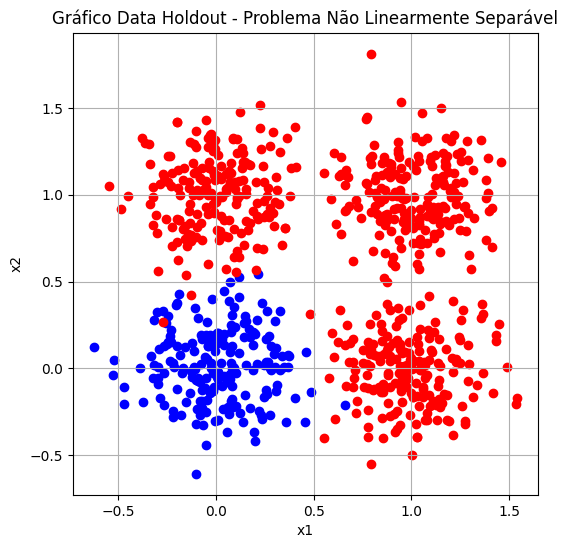

In [43]:
plt.figure(figsize=(6, 6))
for ponto in dados_holdout:
    cor = 'red' if ponto[2] == 0 else 'blue'
    plt.scatter(ponto[0], ponto[1], c=cor)

plt.title('Gráfico Data Holdout - Problema Não Linearmente Separável')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

### Dados para divisão Holdout

In [44]:
random.seed(identificador)
random.shuffle(dados_holdout)
porcentagem = 70/100
ponto_divisao = int(len(dados_holdout) * porcentagem )
treino = dados_holdout[:ponto_divisao]
teste = dados_holdout[ponto_divisao:]
X_treino = np.array([dado[:2] for dado in treino])  
y_treino = np.array([dado[2] for dado in treino])
X_teste = np.array([dado[:2] for dado in teste])  
y_teste = np.array([dado[2] for dado in teste])

### Treinamento do Neurônio

In [45]:
neuronio_perceptron = NeuronioPerceptron()
neuronio_perceptron = neuronio_perceptron.fit(X_treino, y_treino, n_epochs = 100)

print(f"Número total de ajustes nos pesos: {neuronio_perceptron.total_adjusted_weights}")
print(f"Número de épocas até a convergência: {neuronio_perceptron.epochs}")

Número total de ajustes nos pesos: 3451
Número de épocas até a convergência: 100


### Testes após treinamento

In [46]:
X_teste = np.insert(X_teste, 0, neuronio_perceptron.bias, axis = 1)
previsoes = neuronio_perceptron.predict(X_teste)

### Métricas 

In [47]:
def matriz_de_confusao(previsoes, y_teste):
    VP = VN = FP = FN = 0
    for prev, real in zip(previsoes, y_teste):
        if prev == 1 and real == 1:
            VP += 1
        elif prev == 0 and real == 0:
            VN += 1
        elif prev == 1 and real == 0:
            FP += 1
        elif prev == 0 and real == 1:
            FN += 1
    return VP, VN, FP, FN

def calcular_acuracia(VP, VN, FP, FN):
    return (VP + VN) / (VP + VN + FP + FN)

def calcular_precisao(VP, FP):
    return VP / (VP + FP)

def calcular_revocacao(VP, FN):
    return VP / (VP + FN)

def calcular_f1(precisao, revocacao):
    return (2 * precisao * revocacao) / (precisao + revocacao)

# Cálculos manuais
VP, VN, FP, FN = matriz_de_confusao(previsoes, y_teste)
acuracia_manual = calcular_acuracia(VP, VN, FP, FN)
precisao_manual = calcular_precisao(VP, FP)
revocacao_manual = calcular_revocacao(VP, FN)
f1_manual = calcular_f1(precisao_manual, revocacao_manual)

# Resultados
print("------------Cálculos Manuais------------")
print(f"Acurácia:  {acuracia_manual:.4f}")
print(f"Precisão:  {precisao_manual:.4f}")
print(f"Revocação: {revocacao_manual:.4f}")
print(f"F1-score:  {f1_manual:.4f}\n")

# Resultados usando sklearn
print("------------Biblioteca Sklearn------------")
print(f"Acurácia:  {accuracy_score(y_teste, previsoes):.4f}")
print(f"Precisão:  {precision_score(y_teste, previsoes):.4f}")
print(f"Revocação: {recall_score(y_teste, previsoes):.4f}")
print(f"F1-score:  {f1_score(y_teste, previsoes):.4f}")

------------Cálculos Manuais------------
Acurácia:  0.8375
Precisão:  0.6609
Revocação: 1.0000
F1-score:  0.7958

------------Biblioteca Sklearn------------
Acurácia:  0.8375
Precisão:  0.6609
Revocação: 1.0000
F1-score:  0.7958


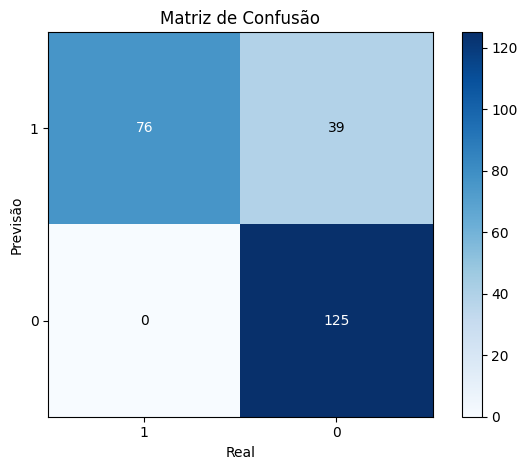

In [48]:
matriz = np.array([[VP, FP],
                   [FN, VN]])

labels = ['1', '0']

fig, ax = plt.subplots()
im = ax.imshow(matriz, cmap='Blues')

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel("Real")
ax.set_ylabel("Previsão")
ax.set_title("Matriz de Confusão")

for i in range(2):
    for j in range(2):
        ax.text(j, i, matriz[i, j], ha='center', va='center',
                color='white' if matriz[i, j] > matriz.max()/2 else 'black')

plt.colorbar(im)
plt.tight_layout()
plt.show()

### Análise dos Resultados

Mesmo com um número alto de ajustes nos pesos (3473) e tendo chegado ao limite de 100 épocas, o perceptron conseguiu alcançar um ótimo desempenho. A acurácia foi de 96,25%, mostrando que a maioria das previsões estavam corretas. As métricas de precisão e revocação também ficaram em níveis muito bons, o que fica ainda mais claro ao olhar o F1-score, que mostra um bom equilíbrio entre elas. Isso tudo é reforçado pela matriz de confusão: dos 240 exemplos, 231 foram classificados corretamente.

### Gráficos com os dados de treinamento e teste

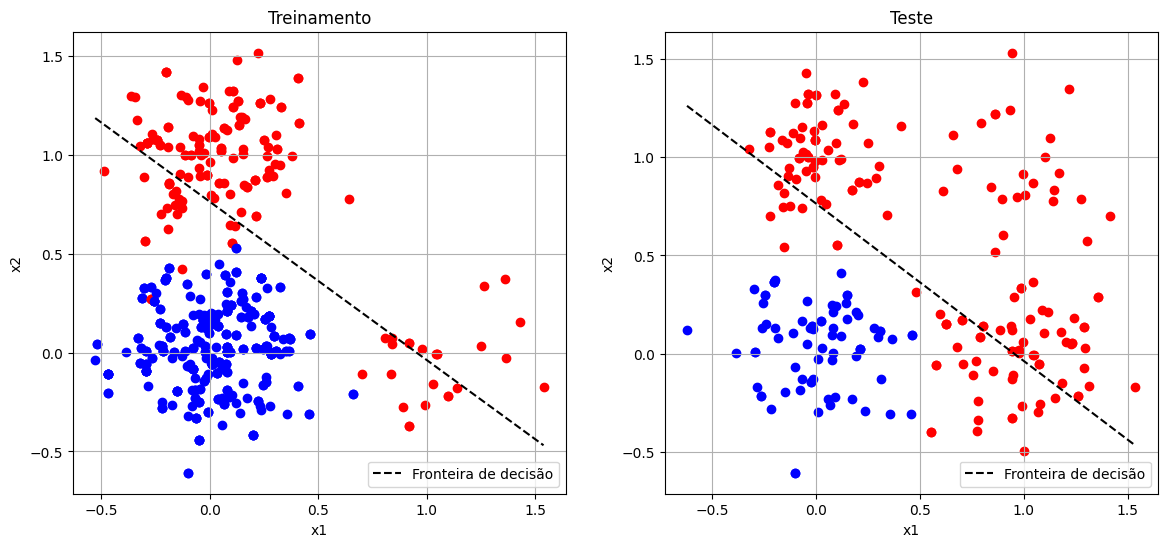

In [49]:
w = neuronio_perceptron.weights

def plotar_dados(ax, X, y, titulo):
    for i in range(len(X)):
        cor = 'red' if y[i] == 0 else 'blue'
        ax.scatter(X[i][1], X[i][2], c=cor)
    x_1 = np.linspace(min(X[:,1]), max(X[:,1]), 100)
    if w[2] != 0:
        x_2 = (w[0]/w[2]) - ((w[1]/w[2]) * x_1)
        ax.plot(x_1, x_2, 'k--', label='Fronteira de decisão')
    ax.set_title(titulo)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.grid(True)
    ax.legend(loc='lower right')

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

plotar_dados(axs[0], np.insert(X_treino, 0, neuronio_perceptron.bias, axis=1), y_treino, "Treinamento")
plotar_dados(axs[1], X_teste, y_teste, "Teste")

plt.show()